## Newton's Method

Assume that an initial estimate $x_0$ is known for the desired root $\alpha$ of $f(x) = 0$. Newton's method will produce a sequence of iterates $\{ x_n : x \ge 1\}$, which we hope will converge to $\alpha$. 

1. Since $x_0$ is assumed close to $\alpha$, approximate the graph of $y = f(x)$ in the vicinity of its root $\alpha$ by constructing its tangent line at $(x_0, f(x_0))$. 
2. Then use the root of this tangent line to approximate $\alpha$; call this new approximation $x_1$.
3. Repeat this process, ad infinitum, to obtain a sequence of iterates $x_n$. 

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \ n \ge 0
$$

In [41]:
from math import pow, exp, sin, cos
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def f(n):
    return np.exp(-n/5) - np.sin(n)

def df(n):
    return 0 - (np.exp(-n/5)/5) - np.cos(n)

### Graph of the Function

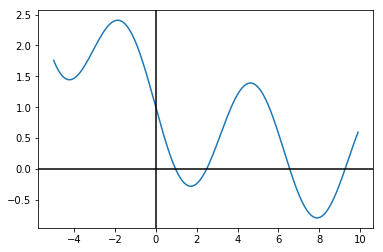

In [43]:
t1 = np.arange(-5, 10, 0.1)
plt.plot(t1, f(t1))

plt.axhline(0, color='black')
plt.axvline(0, color='black')

### Find Roots

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} \ n \ge 0
$$

Notice that what we are doing is essentially grabbing the tangent 

In [45]:
def newton(f, df, a, e):
    """ Newton's Method

    inputs:
    f  - a function.
    df - derivative of function
    a  - Starting interval
    e  - Acceptable value for 0; (e.g. consider 0.001 == 0)
    """
    iteration = 0
    while f(a) > e:
        a = a - f(a)/df(a)
        iteration = iteration + 1

    print("Iterated:", iteration, "times.")
    return a

range = [0, 2.5, 6.5, 9.5] # Estimations of where roots might be. 
for i in range:
    print('f(0) =', newton(f, df, i, 10**(-7)))

Iterated: 4 times.
f(0) = 0.9683197983706969
Iterated: 2 times.
f(0) = 2.4880810122075436
Iterated: 2 times.
f(0) = 6.556052464510788
Iterated: 2 times.
f(0) = 9.267439930410205


### Another Approach using Taylor Series

As another approach to the above, we use a Taylor series development. Expanding $f(x)$ about $x_n$,

$$
f(x) = f(x_n) + (x - x_n)\ f'(x_n)+\frac{(x-x_n)^2}{2}f''(\xi)
$$

with $\xi$ between $x$ and $x_n$. Letting $x = \alpha$ and using $f(\alpha) = 0$, we solve for $\alpha$ to obtain

$$
\alpha = x_n - \frac{(x_n)}{f'(x_n)} - \frac{(a-x_n)^2}{2} \cdot \frac{f''(\xi_n)}{f'(x_n)}
$$

with $\xi_n$ between $x_n$ and $\alpha$. We can drop the error term (the last term) to obtain a better approximation to $\alpha$ than $x_n$, and we recognize this approximation as $x_{n+1}$ from the header above. Then

$$
a - x_{x+1} = -(\alpha - x_n)^2 \cdot \frac{f''(\xi_n)}{2f'(x_n)}, n \ge 0
$$

This formula will be used to show that Newton's method has a quadratic order of convergence, $p = 2$. 